In [93]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import dateutil
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [94]:
corruption = pd.read_csv('corruption.csv')
tourism = pd.read_csv('tourism.csv')
richest = pd.read_csv('richest_countries.csv')

In [95]:
corruption

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15
...,...,...,...
105,Yemen,670,84
106,Venezuela,13080,86
107,Somalia,450,87
108,Syria,1170,87


In [96]:
corruption['country'].unique()

array(['Denmark', 'Finland', 'New Zealand', 'Norway', 'Singapore',
       'Sweden', 'Switzerland', 'Netherlands', 'Luxembourg', 'Germany',
       'United Kingdom', 'Hong Kong', 'Austria', 'Canada', 'Estonia',
       'Iceland', 'Ireland', 'Australia', 'Belgium', 'Japan', 'France',
       'United Arab Emirates', 'United States', 'Qatar', 'Portugal',
       'South Korea', 'Spain', 'Israel', 'Italy', 'Poland',
       'Saudi Arabia', 'Greece', 'Malaysia', 'China', 'Romania',
       'South Africa', 'India', 'Vietnam', 'Argentina', 'Brazil',
       'Indonesia', 'Turkey', 'Sri Lanka', 'Ecuador', 'Thailand',
       'El Salvador', 'Sierra Leone', 'Algeria', 'Egypt', 'Nepal',
       'Philippines', 'Zambia', 'Eswatini', 'Ukraine', 'Gabon', 'Mexico',
       'Niger', 'Papua New Guinea', 'Azerbaijan', 'Bolivia', 'Djibouti',
       'Dominican Republic', 'Kenya', 'Laos', 'Paraguay', 'Togo',
       'Angola', 'Liberia', 'Mali', 'Russia', 'Burma', 'Mauritania',
       'Pakistan', 'Uzbekistan', 'Cameroon',

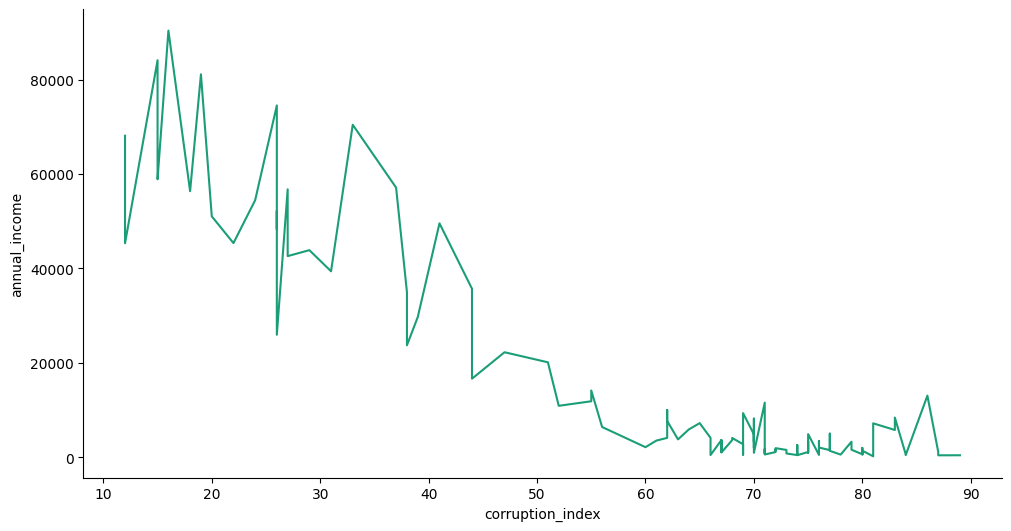

In [97]:
def plot_series(series, series_name):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['corruption_index']
  ys = series['annual_income']
  plt.plot(xs, ys, label=series_name, color=palette[0])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corruption.sort_values('corruption_index', ascending=True)
plot_series(df_sorted, 'Corruption vs income')
sns.despine(fig=fig, ax=ax)
plt.xlabel('corruption_index')
_ = plt.ylabel('annual_income')

In [98]:
cost_of_living = pd.read_csv('cost_of_living.csv')

In [99]:
cost_of_living

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
...,...,...,...,...
102,Burma,27.0,95,6.0
103,Pakistan,25.8,125,8.3
104,Kyrgyzstan,25.3,98,6.6
105,Angola,23.0,148,10.9


In [100]:
merged_df = pd.merge(cost_of_living, corruption, on="country")
fig = px.scatter(merged_df, x="corruption_index", y="purchasing_power_index",
                 hover_data=["country"], title="Corruption Index vs Purchasing Power Index")
fig.show()


In [101]:
merged_df

,country,cost_index,monthly_income,purchasing_power_index,annual_income,corruption_index
0,Switzerland,142.4,7530,90.1,90360,16
1,Israel,130.2,4130,54.1,49560,41
2,Iceland,128.0,5368,71.5,64410,26
3,Norway,124.6,7008,95.9,84090,15
4,Denmark,119.9,5676,80.6,68110,12
...,...,...,...,...,...,...
66,Burma,27.0,95,6.0,1140,72
67,Pakistan,25.8,125,8.3,1500,72
68,Kyrgyzstan,25.3,98,6.6,1180,73
69,Angola,23.0,148,10.9,1770,71


In [102]:
merged_df[merged_df["country"] == "China"]

,country,cost_index,monthly_income,purchasing_power_index,annual_income,corruption_index
31,China,63.2,991,26.7,11890,55


In [103]:
from geopy.geocoders import Photon

df = merged_df
geolocator = Photon(user_agent="measurements")

def get_country_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


df["latitude"], df["longitude"] = zip(*df["country"].apply(get_country_coordinates))

In [104]:
df["relate_cost_to_corr_idxs"] = df["cost_index"] / df["corruption_index"]

In [105]:
trace = go.Scattermapbox(
    lat=df['latitude'],
    lon=df['longitude'],
    text=df["relate_cost_to_corr_idxs"]* 10,
    marker=dict(
        colorscale="Viridis",
        color=df["corruption_index"],
        size=df["cost_index"]/df["corruption_index"] * 10,
        sizemode='diameter'
    )
)

layout = go.Layout(
    mapbox=dict(
        center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean()),
        zoom=2.3
    )
)

fig = go.Figure(trace)
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(
        center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean()),
        zoom=2.3
    ))
fig.show()


In [106]:
!pip install dash

In [107]:
!pip install pycountry_convert

In [108]:
import pycountry_convert as pc

def get_region(country_name):
    try:
        country_alpha_2 = pc.country_name_to_country_alpha2(country_name)
        region_code = pc.country_alpha2_to_continent_code(country_alpha_2)
        return pc.convert_continent_code_to_continent_name(region_code)
    except KeyError:
        return None

country_name = "United States"
region = get_region(country_name)
print(f"The region of {country_name} is: {region}")


The region of United States is: North America


In [109]:
df["region"] = df["country"].apply(get_region)

In [110]:
df

,country,cost_index,monthly_income,purchasing_power_index,annual_income,corruption_index,latitude,longitude,relate_cost_to_corr_idxs,region
0,Switzerland,142.4,7530,90.1,90360,16,38.824926,-85.037397,8.900000,Europe
1,Israel,130.2,4130,54.1,49560,41,30.812425,34.859476,3.175610,Asia
2,Iceland,128.0,5368,71.5,64410,26,64.984182,-18.105901,4.923077,Europe
3,Norway,124.6,7008,95.9,84090,15,61.152939,8.787665,8.306667,Europe
4,Denmark,119.9,5676,80.6,68110,12,55.670249,10.333328,9.991667,Europe
...,...,...,...,...,...,...,...,...,...,...
66,Burma,27.0,95,6.0,1140,72,13.092089,80.291720,0.375000,None
67,Pakistan,25.8,125,8.3,1500,72,30.330840,71.247499,0.358333,Asia
68,Kyrgyzstan,25.3,98,6.6,1180,73,41.508932,74.724091,0.346575,Asia
69,Angola,23.0,148,10.9,1770,71,-11.877577,17.569124,0.323944,Africa


In [111]:
cost_of_living

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
...,...,...,...,...
102,Burma,27.0,95,6.0
103,Pakistan,25.8,125,8.3
104,Kyrgyzstan,25.3,98,6.6
105,Angola,23.0,148,10.9


In [112]:
df_for_map = df[(df['region'] == 'North America') | (df['region'] == 'South America')
| (df['region'] == 'Europe') | (df['region'] == 'Asia') | (df['region'] == 'Oceania')]

In [113]:
df_for_map

,country,cost_index,monthly_income,purchasing_power_index,annual_income,corruption_index,latitude,longitude,relate_cost_to_corr_idxs,region
0,Switzerland,142.4,7530,90.1,90360,16,38.824926,-85.037397,8.900000,Europe
1,Israel,130.2,4130,54.1,49560,41,30.812425,34.859476,3.175610,Asia
2,Iceland,128.0,5368,71.5,64410,26,64.984182,-18.105901,4.923077,Europe
3,Norway,124.6,7008,95.9,84090,15,61.152939,8.787665,8.306667,Europe
4,Denmark,119.9,5676,80.6,68110,12,55.670249,10.333328,9.991667,Europe
...,...,...,...,...,...,...,...,...,...,...
63,India,28.8,181,10.7,2170,60,22.351115,78.667743,0.480000,Asia
64,Nepal,28.1,103,6.2,1230,67,28.108393,84.091714,0.419403,Asia
67,Pakistan,25.8,125,8.3,1500,72,30.330840,71.247499,0.358333,Asia
68,Kyrgyzstan,25.3,98,6.6,1180,73,41.508932,74.724091,0.346575,Asia


In [114]:
df_for_map['relate_purch_to_corr'] = df_for_map['purchasing_power_index'] / df_for_map['corruption_index']

<ipython-input-114-a11b7c41e1fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("График по регионам мира"),
    html.Label("Выберите регион:"),
    dcc.Dropdown(
        id='region-dropdown',
        options=[
            {'label': region, 'value': region} for region in df_for_map['region'].unique()
        ],
        value=df_for_map['region'].iloc[0]
    ),
    dcc.Graph(id='region-graph')
])


@app.callback(
    Output('region-graph', 'figure'),
    [Input('region-dropdown', 'value')]
)
def update_graph(selected_region):
    filtered_data = df_for_map[df_for_map['region'] == selected_region]

    sorted_data = filtered_data.sort_values(by='relate_purch_to_corr')

    fig = px.bar(
        sorted_data,
        x='Страна',
        y=['relate_purch_to_corr', 'relate_cost_to_corr_idxs'],
        barmode='group',
        labels={'value': 'Значение', 'variable': 'Метрика'},
        title=f"Регион: {selected_region}"
    )

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>